<a href="https://colab.research.google.com/github/patrickflemes/etl_python/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ciência de Dados e Big Data**

Faça o download do conjunto de dados disponível aqui:
h?ps://www.kaggle.com/datasets/yasserh/housing-prices-dataset E responda às seguintes perguntas:


a) Qual o tamanho do conjunto de dados?

b) Qual a proporção de valores ausentes em cada coluna?

c) IdenLfique qual é o Lpo de dado de cada coluna, ou seja, se a coluna é categórica ordinal, categórica nominal, numérica discreta, ou numérica conLnua.

d) Faça um gráfico de frequência que exiba o valor dos imóveis agrupados a cada 100 mil dólares.

e) Qual é a residência com o maior valor? Quais as características dessa residência?

f) Calcule o preço médio das residências.

g) Existe relação entre a área da residência e o valor?

Entrega:
Você pode entregar a aLvidade em formato de Jupyter Notebook (recomendado) ou arquivo Python (.py), junto com quaisquer gráficos ou visualizações produzidas durante a análise na MinhaUNO.

## **DESENVOLVIMENTO**

Ao iniciar, realizo a leitura da CSV. Importadas as bibliotecas Pandas para o processo de leitura de manipulação da CSV e matplotlib e seaborn para a parte gráfica.

Como primeira solicitação, retornado o tamanho do conjunto de dados, com a .shape na primeira posição.

In [3]:
# LEITURA DA CSV E CÁLCULO TAMANHO CONJUNTO DE DADOS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


conjunto_dados = pd.read_csv("https://raw.githubusercontent.com/patrickflemes/etl_python/main/Housing.csv")

tamanho_dataset = conjunto_dados.shape[0]
print(f"Tamanho do conjunto de dados: {tamanho_dataset}")
print("\n")

Tamanho do conjunto de dados: 545




Com o .isnull() é procurada a média, .mean() das colunas do conjunto de dados e um arredondamento de dois números após a virgula.

In [6]:
# PROPORÇÃO DE VALORES AUSENTES EM CADA COLUNA

proporcao_ausentes = conjunto_dados.isnull().mean().round(2)
print(f"Proporção de valores ausentes em cada coluna: \n{proporcao_ausentes}")
print("\n")

Proporção de valores ausentes em cada coluna: 
price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64




Com a dtypes é buscado o tipo de dado de cada coluna, retornando com o select realizado.

In [14]:
# TIPO DE DADOS DE CADA COLUNA

tipos_dados = conjunto_dados.dtypes
print(f"Tipo de dado de cada coluna: \n{tipos_dados}")
print("\n")

colunas_categoricas = conjunto_dados.select_dtypes(include=['object', 'category'])
print("\n")

Tipo de dado de cada coluna: 
price                         int64
area                          int64
bedrooms                      int64
bathrooms                     int64
stories                       int64
mainroad                     object
guestroom                    object
basement                     object
hotwaterheating              object
airconditioning              object
parking                       int64
prefarea                     object
furnishingstatus             object
valor_agrupado_maior          int64
valor_agrupado_maior_100k     int64
dtype: object






Primeiramente são definidos os intervalos do conjunto de dados para pegar cada 100 mil. Criada a média de sequência  com intervalos de 100 mil.  

Criado o frame do gráfico no formato histograma e os labels referentes. Criado o gráfico e expostos os valores.



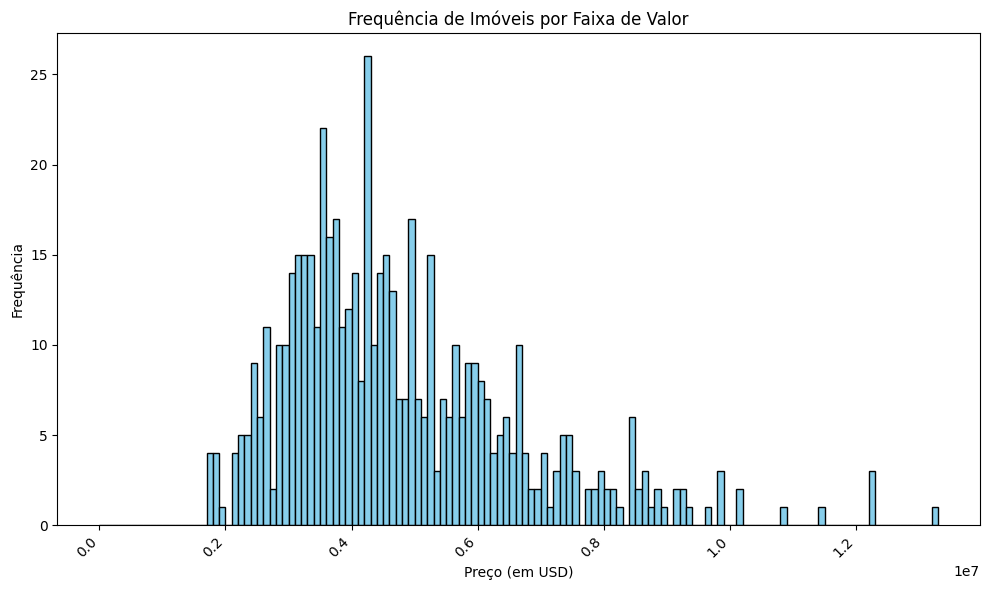

In [26]:
# FRQUÊNCIA DE IMÓVEIS POR VALOR

intervalos = range(0, int(conjunto_dados['price'].max()) + 100000, 100000)

plt.figure(figsize=(10, 6))
plt.hist(conjunto_dados['price'], bins=intervalos, color='skyblue', edgecolor='black')
plt.xlabel("Preço (em USD)")
plt.ylabel("Frequência")
plt.title("Frequência de Imóveis por Faixa de Valor")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Retornada o valor a residência com maior valor e as informações.

In [ ]:
# RESIDÊNCIA COM O MAIOR VALOR E SUAS CARACTERÍSITCAS

residencia_mais_cara = conjunto_dados.loc[conjunto_dados["price"] == conjunto_dados["price"].max()]
print(f"Residência com o maior valor: \n\n{residencia_mais_cara}")

Residência com o maior valor: 

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   

   valor_agrupado  
0             133  


Calculado o valor médio da residência e arredondado para duas casas decimais.

In [ ]:
# PREÇO MÉDIO DAS RESIDÊNCIAS

preco_medio = conjunto_dados["price"].mean().round(2)
print("\n")
print(f"Preço médio das residências: {preco_medio}")
print("\n")



Preço médio das residências: 4766729.25




Criado o gráfico de relação preço x área da residência. Criado o frame de dados 8 x 6.

Utilizado o alpha para retornar a transparência do gráfico e colocados os labes e titulo do gráfico. Preferi nesse caso ativar a grade do gráfico para melhor visualização.  

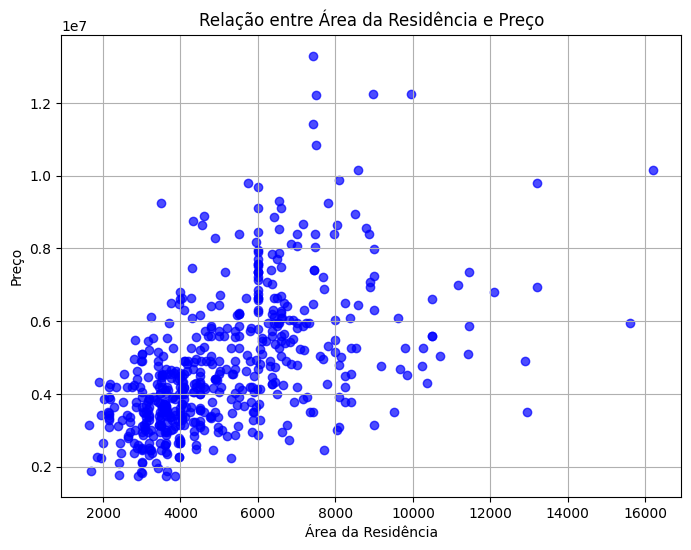

In [31]:
# ÁREA DE RESIDÊNCIA E VALOR

plt.figure(figsize=(8, 6))
plt.scatter(conjunto_dados['area'], conjunto_dados['price'], color='blue', alpha=0.7)
plt.title('Relação entre Área da Residência e Preço')
plt.xlabel('Área da Residência')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

Calculado o coeficiente de relação, considerando a área e o preço. Aredondando para duas casas após a virgula.

In [28]:
# CALCULAR COEFICIENTE DE RELAÇÃO
correlacao = conjunto_dados['area'].corr(conjunto_dados['price']).round(2)
print(f"Coeficiente de correlação entre área e valor: {correlacao}")

Coeficiente de correlação entre área e valor: 0.54
